In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [22]:
foo = lambda x: 4 * x**3 / (x**8 + 1)
A = -1
B = 2

# foo = lambda x: math.e ** x
# A = 0
# B = 1

epsilons = [0.1**i for i in range(3,8)]
# epsilons = [0.001]

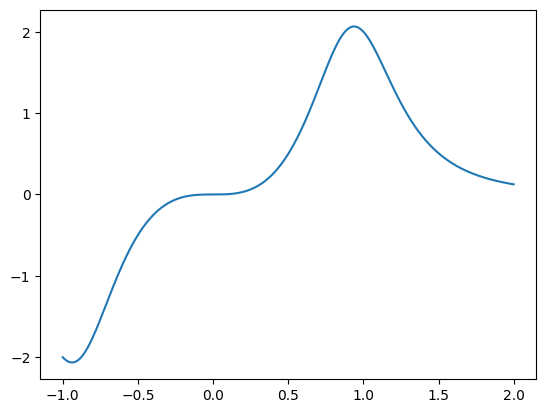

In [23]:
x = np.linspace(A, B, 1000, True)
y = foo(x)
plt.plot(x,y)

In [24]:
def rectangle_rule(n):
    h = (B-A)/n
    return h * sum([foo(A+i*h-h/2) for i in range(1,n+1)])

def trapezoidal_rule(n):
    h = (B-A)/n
    return h * ((foo(A) + foo(B))/2 + sum([foo(A+i*h) for i in range(1,n)]))

def simpson_rule(n):
    # h = (B-A)/n
    a = A
    b = B
    h = (b - a) / n
    summ = 0
    for i in range(1, n+1):
        summ += foo(a + (i - 1) * h) + 4 * foo(a + (i - 0.5) * h) + foo(a + i * h)
    return summ * h / 6
#     return h/6 * sum([
#         foo(A),
#         foo(B),
#         4*sum([foo(A+i*h-h/2) for i in range(1,n+1)]),
#         2*sum([foo(A+i*h) for i in range(1,n)])
#     ])

def calc_R(ih1, ih2, k):
    return (ih1 - ih2)/(2**k - 1)

def run_method(method_func, method_name, k, eps):
    n = 1
    i_pre = method_func(n)
    i_act = method_func(n*2)
    R = calc_R(i_act, i_pre, k)
    num = 1
    while abs(R) > eps:
        n *= 2
        i_pre = i_act
        i_act = method_func(2*n)
        R = calc_R(i_act, i_pre, k)
        num += 1

    return [method_name, num, i_act, i_act + R]    

In [25]:
columns = ['метод', 'итераций', 'INT', 'INT+R']
functs = [rectangle_rule, trapezoidal_rule, simpson_rule]
funct_names = ['метод прямоугольников',  'метод трапеций', 'метод парабол']
ks = [2,2,4]
pd.options.display.float_format = '{:,.10f}'.format
for eps in epsilons:
    results = pd.DataFrame(columns=columns)
    results.set_index('метод')
    for funct, name, k in zip(functs, funct_names, ks):
        res = run_method(funct, name, k, eps)
        results = pd.concat(
            [results, pd.DataFrame([res], columns=columns)]
        )
    results['R'] = results['INT+R'] - results['INT'] 
    print(f'EPS = {eps}')
    print(results)
    print()

EPS = 0.0010000000000000002
                   метод итераций          INT        INT+R             R
0  метод прямоугольников        5 0.7223422932 0.7230711214  0.0007288282
0         метод трапеций        6 0.7232901605 0.7229742047 -0.0003159558
0          метод парабол        2 0.8519388854 0.8527303228  0.0007914375

EPS = 0.00010000000000000002
                   метод итераций          INT        INT+R             R
0  метод прямоугольников        7 0.7229405901 0.7229796254  0.0000390353
0         метод трапеций        7 0.7230568223 0.7229790429 -0.0000777794
0          метод парабол        5 0.7229742047 0.7229806658  0.0000064611

EPS = 1.0000000000000003e-05
                   метод итераций          INT        INT+R             R
0  метод прямоугольников        8 0.7229696752 0.7229793702  0.0000096950
0         метод трапеций        9 0.7229841907 0.7229793522 -0.0000048385
0          метод парабол        5 0.7229742047 0.7229806658  0.0000064611

EPS = 1.000000000000000